In [13]:
import time
import torch
import pandas as pd
import numpy as np
import mlrose_hiive as mlrose
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as nf
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


In [8]:
#define func to time each optimization run


In [9]:
#Start with peaks problem, highlighting the strengths of genetic algos
weights = [10, 5, 3, 20, 15, 16, 3, 1, 11, 12]
values = [2, 3, 3, 5, 10, 14, 4, 1, 2, 6]
max_weight = .5
knapsack_fitness_func = mlrose.Knapsack(weights, values, max_weight)
knapsack_problem = mlrose.DiscreteOpt(length=10, fitness_fn=knapsack_fitness_func, max_val=2)

In [349]:
#Randomized hill cimb up first
start = time.time()
rhc_knapsack_best_state, rhc_knapsack_best_fitness, rhc_knapsack_fitness_curve = mlrose.random_hill_climb(
    problem=knapsack_problem,
    restarts=100,
    max_attempts=1000,
    max_iters=10000,
    init_state=np.array([0 for i in range(10)]),
    curve=True
)
end = time.time()
rhc_knapsack_time = end - start
print(f'RHC Time: {rhc_knapsack_time}')


start = time.time()
#simulated annealing
sa_knapsack_best_state, sa_knapsack_best_fitness, sa_knapsack_fitness_curve = mlrose.simulated_annealing(
    problem=knapsack_problem,
    schedule=mlrose.ArithDecay(),
    max_attempts=100,
    max_iters=100,
    init_state=np.array([0 for i in range(10)]),
    curve=True
)
end = time.time()
sa_knapsack_time = end - start
print(f'Simulated Annealing Time: {sa_knapsack_time}')


start = time.time()
#mimic
mimic_knapsack_best_state, mimic_knapsack_best_fitness, mimic_knapsack_fitness_curve = mlrose.mimic(
    problem=knapsack_problem,
    max_attempts=10,
    max_iters=10,
    curve=True
)
end = time.time()
mimic_knapsack_time = end - start
print(f'Mimic Time: {mimic_knapsack_time}')


start = time.time()
#genetic algorithm
genetic_knapsack_best_state, genetic_knapsack_best_fitness, genetic_knapsack_fitness_curve = mlrose.genetic_alg(
    problem=knapsack_problem,
    pop_size=100,
    pop_breed_percent=.5,
    max_attempts=5,
    max_iters=10,
    curve=True
)
end = time.time()
genetic_knapsack_time = end - start
print(f'Genetic Time: {genetic_knapsack_time}')



RHC Time: 0.9659161567687988
Simulated Annealing Time: 0.0013267993927001953
Mimic Time: 0.16503190994262695
Genetic Time: 0.010120391845703125


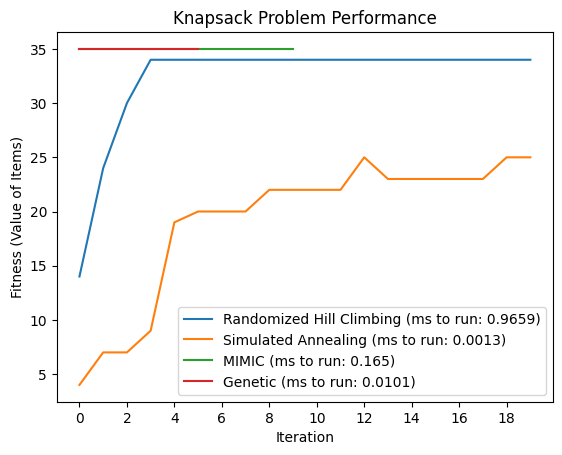

<Figure size 640x480 with 0 Axes>

In [350]:
#fitness curves for knapsack
plt.plot(rhc_knapsack_fitness_curve[:20, 0], label = f'Randomized Hill Climbing (ms to run: {round(rhc_knapsack_time, 4)})')
plt.plot(sa_knapsack_fitness_curve[:20, 0], label = f'Simulated Annealing (ms to run: {round(sa_knapsack_time, 4)})')
plt.plot(mimic_knapsack_fitness_curve[:20, 0], label = f'MIMIC (ms to run: {round(mimic_knapsack_time, 4)})')
plt.plot(genetic_knapsack_fitness_curve[:20, 0], label = f'Genetic (ms to run: {round(genetic_knapsack_time, 4)})')
plt.ylabel('Fitness (Value of Items)')
plt.xlabel('Iteration')
plt.title('Knapsack Problem Performance')
plt.legend()
plt.xticks([i * 2 for i in range(10)])
plt.savefig('knapsack_performance.png')
plt.show()
plt.clf()

In [12]:
#traveling salesman problem to highlight strengths of simulated annealing
cities = [(0,0), (0,5), (3,6), (5,10), (8,2), (10,10), (2, 3), (7, 7)]
distances = [(0,1,5), (0,4,7), (0,2,9), (1,2,3), (1,3,6), (2,3,5), (2,5,8), (2,4,9), (3,5,5), (4,5,10)]
traveling_sales_fitness_func = mlrose.TravellingSales(cities)
traveling_sales_problen = mlrose.TSPOpt(8, traveling_sales_fitness_func)

In [62]:
#6 peaks to highlight simulated annealing
peaks_fitness_func = mlrose.SixPeaks(.2)
peaks_problem = mlrose.DiscreteOpt(20, peaks_fitness_func)

In [345]:
# Randomized Hill Climb
start = time.time()
rhc_peaks_best_state, rhc_peaks_best_fitness, rhc_peaks_fitness_curve = mlrose.random_hill_climb(
    problem=peaks_problem,
    restarts=100,
    max_attempts=2000,
    max_iters=10000,
    init_state=np.array([0 for i in range(20)]),
    curve=True
)
end = time.time()
rhc_peaks_time = end - start
print(f'RHC Time: {rhc_peaks_time}')

# Simulated Annealing
start = time.time()
sa_peaks_best_state, sa_peaks_best_fitness, sa_peaks_fitness_curve = mlrose.simulated_annealing(
    problem=peaks_problem,
    schedule=mlrose.ArithDecay(),
    max_attempts=1000,
    max_iters=10000,
    init_state=np.array([i % 2 for i in range(20)]),
    curve=True
)
end = time.time()
sa_peaks_time = end - start
print(f'Simulated Annealing Time: {sa_peaks_time}')
# MIMIC
start = time.time()
mimic_peaks_best_state, mimic_peaks_best_fitness, mimic_peaks_fitness_curve = mlrose.mimic(
    problem=peaks_problem,
    max_attempts=100,
    max_iters=1000,
    curve=True,
    
)
end = time.time()
mimic_peaks_time = end - start
print(f'MIMIC Time: {mimic_peaks_time}')

# Genetic Algorithm
start = time.time()
genetic_peaks_best_state, genetic_peaks_best_fitness, genetic_peaks_fitness_curve = mlrose.genetic_alg(
    problem=peaks_problem,
    max_attempts=200,
    max_iters=100,
    curve=True
)
end = time.time()
genetic_peaks_time = end - start
print(f'Genetic Algorithm Time: {genetic_peaks_time}')

print(sa_peaks_best_fitness, sa_peaks_best_state)

RHC Time: 1.2328243255615234
Simulated Annealing Time: 0.05718278884887695
MIMIC Time: 6.179181814193726
Genetic Algorithm Time: 0.30934691429138184
35.0 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0]


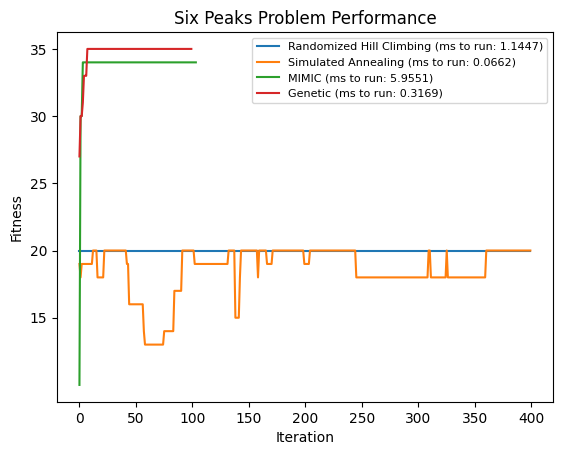

<Figure size 640x480 with 0 Axes>

In [263]:
#fitness curves for six peaks
plt.plot(rhc_peaks_fitness_curve[:400, 0], label = f'Randomized Hill Climbing (ms to run: {round(rhc_peaks_time, 4)})')
plt.plot(sa_peaks_fitness_curve[800:1200, 0], label = f'Simulated Annealing (ms to run: {round(sa_peaks_time, 4)})')
plt.plot(mimic_peaks_fitness_curve[:, 0], label = f'MIMIC (ms to run: {round(mimic_peaks_time, 4)})')
plt.plot(genetic_peaks_fitness_curve[:, 0], label = f'Genetic (ms to run: {round(genetic_peaks_time, 4)})')
plt.legend(prop={'size': 8})
plt.title('Six Peaks Problem Performance')
plt.ylabel('Fitness')
plt.xlabel('Iteration')
plt.savefig('peaks_performance.png')
plt.yticks([i * 5 + 15 for i in range(5)])
plt.show()
plt.clf()

In [278]:
#Create custom fitness function to turn N-Queens into a Maximization Problem
#possible solution: 0, 6, 3, 5, 7, 1, 4, 2
queens_fitness_func_helper = mlrose.Queens()
queens_fitness_func = mlrose.CustomFitness(lambda state: 1000 - queens_fitness_func_helper.evaluate(state), 'discrete')
queens_problem = mlrose.DiscreteOpt(8, queens_fitness_func, max_val=8)
queens_fitness_func_helper.evaluate(np.array([0, 1, 2, 3, 4, 5, 6, 7]))

28

In [397]:
# Randomized Hill Climb
start = time.time()
rhc_queens_best_state, rhc_queens_best_fitness, rhc_queens_fitness_curve = mlrose.random_hill_climb(
    problem=queens_problem,
    restarts=100,
    max_attempts=200,
    max_iters=10000,
    random_state=[0 for _ in range(10)],
    curve=True
)
end = time.time()
rhc_queens_time = end - start
print(f'RHC Time: {rhc_queens_time}')

# Simulated Annealing
start = time.time()
sa_queens_best_state, sa_queens_best_fitness, sa_queens_fitness_curve = mlrose.simulated_annealing(
    problem=queens_problem,
    schedule=mlrose.ArithDecay(),
    max_attempts=500,
    max_iters=10000,
    random_state=[0 for _ in range(10)],
    curve=True
)
end = time.time()
sa_queens_time = end - start
print(f'Simulated Annealing Time: {sa_queens_time}')

# MIMIC
start = time.time()
mimic_queens_best_state, mimic_queens_best_fitness, mimic_queens_fitness_curve = mlrose.mimic(
    problem=queens_problem,
    pop_size=350,
    max_attempts=5,
    max_iters=5,
    random_state=312,
    curve=True
)
end = time.time()
mimic_queens_time = end - start
print(f'MIMIC Time: {mimic_queens_time}')

# Genetic Algorithm
start = time.time()
genetic_queens_best_state, genetic_queens_best_fitness, genetic_queens_fitness_curve = mlrose.genetic_alg(
    problem=queens_problem,
    max_attempts=10,
    max_iters=1000,
    curve=True
)
end = time.time()
genetic_queens_time = end - start
print(f'Genetic Algorithm Time: {genetic_queens_time}')
print(mimic_queens_best_fitness, mimic_queens_best_state)

RHC Time: 1.8585009574890137
Simulated Annealing Time: 0.7095000743865967
MIMIC Time: 0.1814272403717041
Genetic Algorithm Time: 0.24717259407043457
27.0 [2 7 3 6 0 5 1 4]


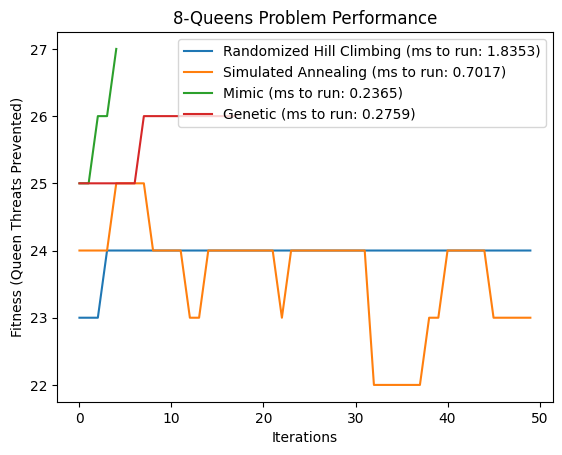

<Figure size 640x480 with 0 Axes>

In [387]:
# Fitness curves for Knapsack
plt.plot(rhc_queens_fitness_curve[25:75, 0], label = f'Randomized Hill Climbing (ms to run: {round(rhc_queens_time, 4)})')
plt.plot(sa_queens_fitness_curve[1650:1700, 0], label = f'Simulated Annealing (ms to run: {round(sa_queens_time, 4)})')
plt.plot(mimic_queens_fitness_curve[:50, 0], label = f'Mimic (ms to run: {round(mimic_queens_time, 4)})')
plt.plot(genetic_queens_fitness_curve[:50, 0], label = f'Genetic (ms to run: {round(genetic_queens_time, 4)})')
plt.title('8-Queens Problem Performance')
plt.xlabel('Iterations')
plt.ylabel('Fitness (Queen Threats Prevented)')
plt.legend()
plt.savefig('queens_performance.png')
plt.show()
plt.clf()


In [351]:
#create vars to hold results
knapsack_results = {
    'curve': [rhc_knapsack_fitness_curve, sa_knapsack_fitness_curve, mimic_knapsack_fitness_curve, genetic_knapsack_fitness_curve],
    'state': [rhc_knapsack_best_state, sa_knapsack_best_state, mimic_knapsack_best_state, genetic_knapsack_best_state],
    'fit': [rhc_knapsack_best_fitness, sa_knapsack_best_fitness, mimic_knapsack_best_fitness, genetic_knapsack_best_fitness]}

peaks_results = {
    'curve': [rhc_peaks_fitness_curve, sa_peaks_fitness_curve, mimic_peaks_fitness_curve, genetic_peaks_fitness_curve],
    'state': [rhc_peaks_best_state, sa_peaks_best_state, mimic_peaks_best_state, genetic_peaks_best_state],
    'fit': [rhc_peaks_best_fitness, sa_peaks_best_fitness, mimic_peaks_best_fitness, genetic_peaks_best_fitness]
}

queens_results = {
    'curve': [rhc_queens_fitness_curve, sa_queens_fitness_curve, mimic_queens_fitness_curve, genetic_queens_fitness_curve],
    'state': [rhc_queens_best_state, sa_queens_best_state, mimic_queens_best_state, genetic_queens_best_state],
    'fit': [rhc_queens_best_fitness, sa_queens_best_fitness, mimic_queens_best_fitness, genetic_queens_best_fitness]
}

print(knapsack_results['fit'])

[35.0, 23.0, 35.0, 35.0]


In [326]:
print([i % 2 for i in range(20)])
[0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1]


[0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]


[0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]

In [353]:
for l in queens_results['state']:
    print(','.join([str(i) for i in l]))

print(queens_results['fit'])

4,6,0,3,1,7,5,2
0,4,7,5,2,6,1,3
5,3,6,0,7,1,4,2
7,5,3,0,6,4,2,1
[27.0, 27.0, 27.0, 26.0]


In [5]:
def load_data():
    
    df = pd.read_csv('./heart.csv')
    df.describe()
        #First we need to turn the categorical data into numbers
    #for sex, M = 0, F = 1
    df['Sex'] = df['Sex'].transform(lambda sex: 0 if sex == 'M' else 1)
    
    df['ChestPainType'].unique()
    #ATA = 0, NAP = 1, ASY = 2, TA = 3
    df['ChestPainType'] = df['ChestPainType'].transform(lambda pain_type: 0 if pain_type == 'ATA' else 1 if pain_type == 'NAP' else 2 if pain_type == 'ASY' else 3)
    
    #restingECG Normal = 0, ST(ST-T wave abnormality) = 1, LVH(probably or definite left ventricular hypertrophy) = 2
    df['RestingECG'] = df['RestingECG'].transform(lambda ecg: 0 if ecg == 'Normal' else 1 if ecg == 'ST' else 2)
    
    #Exercise Angina (chest pain)
    #Y = 1, N = 0
    df['ExerciseAngina'] = df['ExerciseAngina'].transform(lambda angia: 0 if angia == 'N' else 1)
    
    #ST Slope
    #up = 0, flat = 1, down = 2
    df['ST_Slope'] = df['ST_Slope'].transform(lambda slope: 0 if slope == 'Up' else 1 if slope == 'Flat' else 2)

    return df

def evaluate_sk(model, test_sizes, X, Y, file_name, title):
    test_results, train_results = [], []
    for size in test_sizes:
        x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=size, random_state=0)
        model.fit(x_train, y_train)
        test_results.append(model.score(x_test, y_test))
        train_results.append(model.score(x_train, y_train))

    plt.title(title)

    plt.plot(train_results, label='Train')
    plt.plot(test_results, label='Test')
    plt.xticks([i * 10 for i in test_sizes], test_sizes + [])
    plt.ylim((.1, 1.1))
    plt.ylabel('Accuracy')
    plt.xlabel('Test Porportion')
    plt.legend()
    plt.savefig(file_name)
    plt.show()
    plt.clf()


In [7]:
'''
Let's take a look at correlations
'''
df = load_data()
print(df.corrwith(df['HeartDisease']))
'''
RestingBP and RestingECG have very weak correlations, let's remove them.

'''
'''
We need to divide the data into X and Y and split again 
'''
X = df.drop('HeartDisease', axis=1)
Y = df['HeartDisease']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.2, random_state=0)

Age               0.282039
Sex              -0.305445
ChestPainType     0.459017
RestingBP         0.107589
Cholesterol      -0.232741
FastingBS         0.267291
RestingECG        0.061011
MaxHR            -0.400421
ExerciseAngina    0.494282
Oldpeak           0.403951
ST_Slope          0.558771
HeartDisease      1.000000
dtype: float64


In [246]:
# Initialize neural network object and fit object
rhc_nn = mlrose.NeuralNetwork(hidden_nodes = [9], activation = 'sigmoid', \
                                 algorithm = 'random_hill_climb', max_iters = 50000, \
                                 bias = True, is_classifier = True, learning_rate = 0.001, \
                                 early_stopping = False, clip_max = 5, max_attempts = 10000, \
                                 random_state = 3, curve = True)

rhc_nn.fit(x_train, y_train)

NeuralNetwork(activation='sigmoid', clip_max=5, curve=True, hidden_nodes=[9],
              learning_rate=0.001, max_attempts=10000, max_iters=50000,
              random_state=3)

In [247]:
print(f'Train Accuracy: {rhc_nn.score(x_train, y_train)}')
print(f'Test Accuracy: {rhc_nn.score(x_test, y_test)}')
print(f'Loss: {rhc_nn.loss}')

Train Accuracy: 0.7247956403269755
Test Accuracy: 0.7391304347826086
Loss: 0.6201132954289632


In [231]:
# Initialize neural network object and fit object
ga_nn = mlrose.NeuralNetwork(hidden_nodes = [9], activation = 'sigmoid', \
                                 algorithm = 'genetic_alg', max_iters = 5000, \
                                 bias = True, is_classifier = True, learning_rate = 0.01, \
                                 early_stopping = True, clip_max = 5, max_attempts = 1000, \
                                 random_state = 3, mutation_prob = .2, curve = True)

ga_nn.fit(x_train, y_train)

NeuralNetwork(activation='sigmoid', algorithm='genetic_alg', clip_max=5,
              curve=True, early_stopping=True, hidden_nodes=[9],
              learning_rate=0.01, max_attempts=1000, max_iters=5000,
              mutation_prob=0.2, random_state=3)

In [233]:
print(f'Train Accuracy: {ga_nn.score(x_train, y_train)}')
print(f'Test Accuracy: {ga_nn.score(x_test, y_test)}')
print(f'Loss: {ga_nn.loss}')

Train Accuracy: 0.7520435967302452
Test Accuracy: 0.7445652173913043
Loss: 0.5429854799548919


In [234]:
# Initialize neural network object and fit object
sa_nn = mlrose.NeuralNetwork(hidden_nodes = [9], activation = 'sigmoid', \
                                 algorithm = 'simulated_annealing', max_iters = 10000, \
                                 bias = False, is_classifier = True, learning_rate = 0.001, \
                                 early_stopping = False, clip_max = 5, max_attempts = 10000, \
                                 random_state = 3, curve = True, schedule = mlrose.ArithDecay())

sa_nn.fit(x_train, y_train)


NeuralNetwork(activation='sigmoid', algorithm='simulated_annealing', bias=False,
              clip_max=5, curve=True, hidden_nodes=[9], learning_rate=0.001,
              max_attempts=10000, max_iters=10000, random_state=3,
              schedule=ArithDecay(init_temp=1.0, decay=0.0001, min_temp=0.001))

In [235]:
# Predict labels for train set and assess accuracy

print(f'Train Accuracy: {sa_nn.score(x_train, y_train)}')

print(f'Test Accuracy: {sa_nn.score(x_test, y_test)}')
print(f'Loss: {sa_nn.loss}')

Train Accuracy: 0.5435967302452316
Test Accuracy: 0.5760869565217391
Loss: 0.6754681821334677


In [238]:
len(ga_nn.fitness_curve)

5000

In [294]:
ga_plt = ga_nn.fitness_curve[:, 0][::1]
rhc_plt = rhc_nn.fitness_curve[:, 0][::10]
sa_plt = sa_nn.fitness_curve[:, 0][::2]

ga_nn.fitness_curve[0, 0]

0.662919847394036

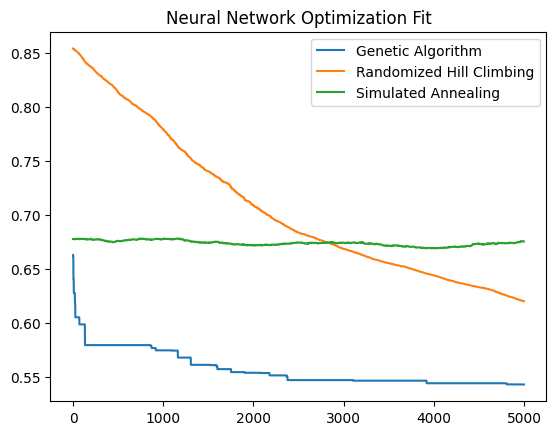

In [291]:
plt.clf()
plt.plot(ga_plt,label='Genetic Algorithm')
plt.plot(rhc_plt, label='Randomized Hill Climbing')
plt.plot(sa_plt, label='Simulated Annealing')
plt.legend()
plt.title('Neural Network Optimization Fit')
plt.savefig('nn_results.png')
plt.show()

In [296]:
ga_nn.fitted_weights

array([ 1.06830409,  2.99075857,  4.96045034, -4.91296223,  1.07071864,
        3.99423429, -0.3214814 ,  2.30884466,  1.15599659,  3.37344748,
       -4.47910544, -0.54460467,  2.94612874,  1.60331849, -0.78279666,
       -1.74841228, -3.52377434, -2.64300703,  3.51030017,  0.6784239 ,
       -1.16063485,  2.96145064, -0.84987283,  2.02880053,  4.69019289,
       -2.75468371,  4.89688085,  0.03054774, -3.63262521,  1.29655872,
       -0.29367976, -1.58626212, -0.07746525, -0.63746286, -3.78055053,
        1.7869098 , -3.6098193 , -4.95201897, -4.3618705 , -4.64613442,
        0.01964397, -0.18965931, -1.30884954, -3.47399373,  0.57457929,
       -1.36565068, -2.91176805, -1.08371367,  0.97337226,  4.67250395,
        2.2634958 , -4.3653841 , -0.90367817,  4.044221  , -4.08739772,
        0.38972445, -0.60340201, -3.1200955 ,  1.46711692, -4.87254874,
       -3.04928651,  3.24012733,  0.2538045 , -4.05041352, -4.07718792,
       -0.83810978,  1.69390958,  2.03463403, -3.33268888, -3.26